<a href="https://colab.research.google.com/github/Ivanova-Daria/Labworks/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0_4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

Мы импортируем все библиотеки и сохраняем URL в переменной. Затем мы делаем HTTP запросить этот URL-адрес с помощью метода get для получения информации с этой веб-страницы.
Текстовый атрибут объекта запросов содержит данные HTML, которые передаются в функция pd.read_html. Эта функция возвращает список объектов DataFrame, содержащих различные таблицы на веб-странице. Поскольку на веб-странице есть только одна таблица, DataFrame (df) содержит только одну таблицу.

In [1]:
#importing the libraries
import requests #позволяет делать запрос к странице
import pandas as pd
import seaborn as sns #рисовалка
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0] #номер таблицы с сайта


Изучаем  первые 5 записей: 

In [21]:
df.head()

,Date,Film,Gross,Month
0,2018-01-07,Star Wars: The Last Jedi,6557062,1
1,2018-01-14,Jumanji: Welcome to the Jungle,2127871,1
2,2018-01-21,Brillantissime,2006033,1
3,2018-01-28,The Post,2771269,1
4,2018-02-04,Les Tuche 3,16604101,2


Получение типов данных и пропущенных значений:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     object
 4   Notes   50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


Как мы видим, типы данных столбцов не в нужном нам формате. Gross столбец представляет собой числовой столбец. Однако этому столбцу был назначен тип данных объекта, поскольку он содержит как числовые, так и нечисловые
данные (символы типа “,”, “$”  и буквы типа «U» и «S»). Преобразуем данные:

# **Шаг 2. Обработка данных** 

На этом этапе мы:
  1. Удалим ненужные символы.
  2. Изменим типы данных.
  3. Удалим ненужные столбцы.
  4. Создадим новый столбец из существующего столбца.

Удалим ненужные строки из столбца **Gross**, оставив только
числовые значения:

In [5]:
df['Gross']=df['Gross'].str.replace(r"US\$","").str.replace(r",","")

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,6557062,[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,2127871,[2]
2,3,"January 21, 2018",Brillantissime,2006033,[3]
3,4,"January 28, 2018",The Post,2771269,[4]
4,5,"February 4, 2018",Les Tuche 3,16604101,[5]


 Первая замена
метод удаляет «US$», а второй метод замены удаляет запятые. Замена
символ с пустой строкой ("") эквивалентен удалению символа. Теперь давайте используем метод **astype** для приведения типа или изменения типа данных этого столбца на **int64**, чтобы этот столбец можно было использовать для вычислений и визуализаций:

In [19]:
df['Gross']=df['Gross'].astype('int64')

check:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    50 non-null     datetime64[ns]
 1   Film    50 non-null     object        
 2   Gross   50 non-null     int64         
 3   Month   50 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.7+ KB


In [8]:
df['Gross'].head()

0     6557062
1     2127871
2     2006033
3     2771269
4    16604101
Name: Gross, dtype: int64

Нам также нужно извлечь месяц из даты, сначала изменив тип данных столбца «Дата» и затем применив к нему метод **DatetimeIndex**, как показано ниже:

In [16]:
df['Date']=df['Date'].astype('datetime64')

In [17]:
df['Month']=pd.DatetimeIndex(df['Date']).month

Наконец, мы удаляем два ненужных столбца из DataFrame, используя следующие
утверждение.

In [23]:
df.drop(['#','Notes'],axis=1,inplace = True)


In [23]:
df.head()

,Date,Film,Gross,Month
0,2018-01-07,Star Wars: The Last Jedi,6557062,1
1,2018-01-14,Jumanji: Welcome to the Jungle,2127871,1
2,2018-01-21,Brillantissime,2006033,1
3,2018-01-28,The Post,2771269,1
4,2018-02-04,Les Tuche 3,16604101,2


# **Шаг 3: Визуализация**

 сначала мы создаем еще один DataFrame (df1), который содержит подмножество
столбцов, которые содержат исходный DataFrame (df). Этот DataFrame, df1, содержит всего два столбцы - «Фильм» (название фильма) и «Gross» (Выручка). Затем мы сортируем значения выручки в порядке убывания. 

In [24]:
df1 = df[['Film','Gross']].sort_values(ascending=False,by='Gross')

В этот DataFrame добавляется нежелательный столбец («index»)

In [ ]:
#df1.drop(['index'],axis=1,inplace=True)

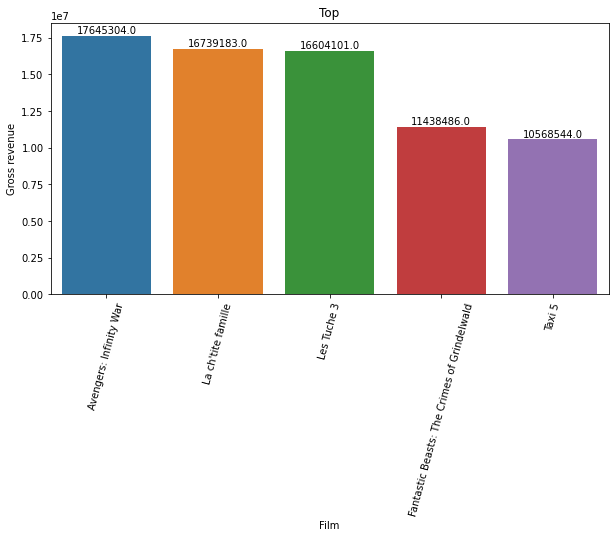

In [27]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Film',y='Gross',data=df1.head(5))
ax.set_xticklabels(labels=df1.head()['Film'],rotation=75)
ax.set_title("Top")
ax.set_ylabel("Gross revenue")
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

Чтобы отобразить долю десяти лучших фильмов (по выручке), мы создаем круговую диаграмму.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa80dbf5590>,)

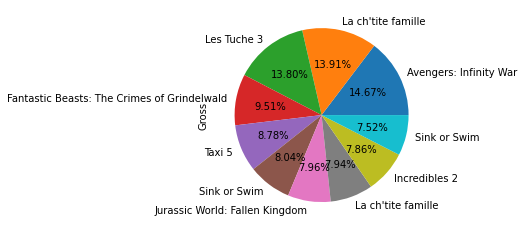

In [30]:
df1['Gross'].head(10).plot(kind='pie',autopct='%.2f%%', labels=df1['Film']),

Сначала мы создаем еще один DataFrame, который собирает данные за месяц, вычисляя в среднем за каждый месяц

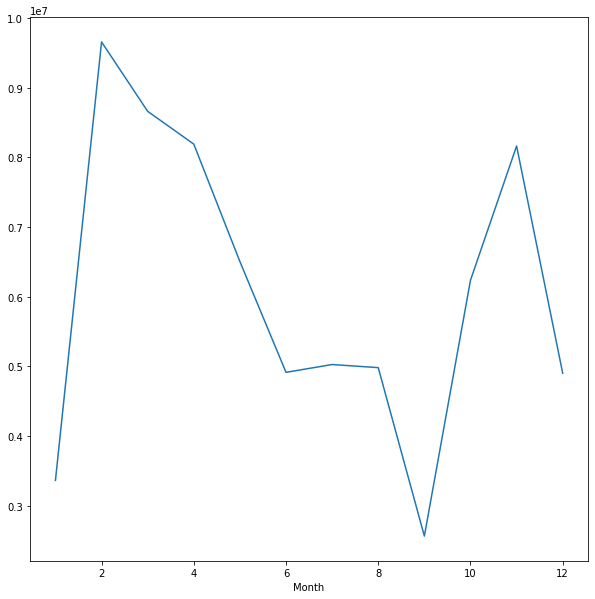

In [33]:
df2 = df.groupby('Month')['Gross'].mean()
df2.plot(kind='line',figsize=(10,10))

# **Шаг 4: построение выводов на основе анализа и визуализаций**

1. Средний ежемесячный доход сильно колеблется, возможно
зависит от месяца выпуска фильмов, который может требуют дальнейшего анализа на протяжении многих лет.
  2. Три самых прибыльных фильма во Франции в 2018 году вышли Avengers, La Ch’tite Famille и Les Tuche 3.

# Вариант 9.

**Вариант** **9**. неструктурированных данных: использование данных с веб-страницы, обеспечивающей информацией о самых кассовых фильмах Малайзии.
List of highest-grossing films in Malaysia


In [155]:
import requests #позволяет делать запрос к странице
import pandas as pd
import seaborn as sns #рисовалка
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Malaysia'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[1] #номер таблицы с сайта

In [77]:
df.head()

,0,1
0,NaN,This article needs additional citations for ve...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         10 non-null     int64 
 1   Film         10 non-null     object
 2   Gross (RM)   10 non-null     object
 3   Budget (RM)  10 non-null     object
 4   Year         10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [2]:
import requests #позволяет делать запрос к странице
import pandas as pd
import seaborn as sns #рисовалка
import matplotlib.pyplot as plt
#Importing the data from the webpage into a DataFrame
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Malaysia'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[1] #номер таблицы с сайта

In [3]:


df['Gross (RM)']=df['Gross (RM)'].str.replace(r"million","")
df['Gross (RM)']=df['Gross (RM)'].astype('float64')
df.loc[:,'Gross (RM)'] *= 1000000 
df['Gross (RM)']=df['Gross (RM)'].astype('int64')
df['Budget (RM)']=df['Budget (RM)'].str.replace(r"million","")
df['Budget (RM)']=df['Budget (RM)'].astype('float64')
df.loc[:,'Budget (RM)'] *= 1000000 
df['Budget (RM)']=df['Budget (RM)'].astype('int64')
a = df.loc[0:6,'Year'].map(lambda x: str(x)[:-3])
b = df.loc[7:8,'Year'].map(lambda x: str(x)[:-4])
df.loc[0:6,'Year']= a
df.loc[7:8,'Year']= b
df['Year']=df['Year'].astype('int64')
df


,Rank,Film,Gross (RM),Budget (RM),Year
0,1,Munafik 2,48000000,2500000,2018
1,2,Hantu Kak Limah,36230000,1200000,2018
2,3,Ejen Ali: The Movie,30050000,6500000,2019
3,4,BoBoiBoy Movie 2,29570000,7000000,2019
4,5,PASKAL,28980000,10000000,2018
5,6,Upin & Ipin: Keris Siamang Tunggal,26190000,20000000,2019
6,7,Polis Evo 2,22450000,8000000,2018
7,8,Munafik,19040000,1600000,2016
8,9,Abang Long Fadil 2,18150000,3200000,2017
9,10,Polis Evo,17740000,2400000,2015


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         10 non-null     int64 
 1   Film         10 non-null     object
 2   Gross (RM)   10 non-null     int64 
 3   Budget (RM)  10 non-null     int64 
 4   Year         10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


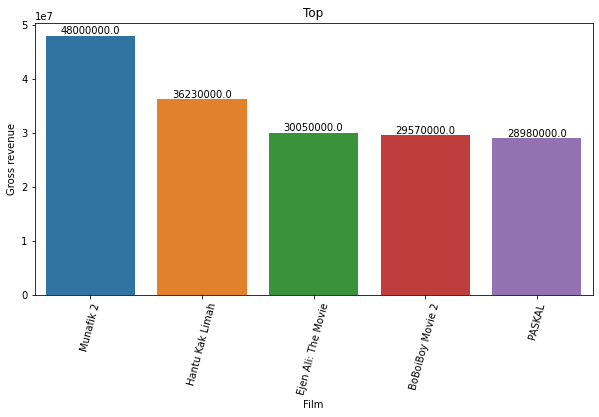

In [158]:
df1 = df[['Film','Gross (RM)']].sort_values(ascending=False,by='Gross (RM)')
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Film',y='Gross (RM)',data=df1.head(5))
ax.set_xticklabels(labels=df1.head()['Film'],rotation=75)
ax.set_title("Top")
ax.set_ylabel("Gross revenue")
for p in ax.patches:
  ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

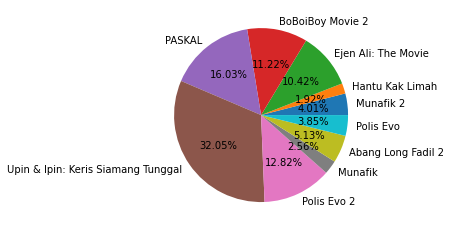

In [26]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.pie(df['Budget (RM)'],autopct='%.2f%%', labels=df['Film'])
plt.show()

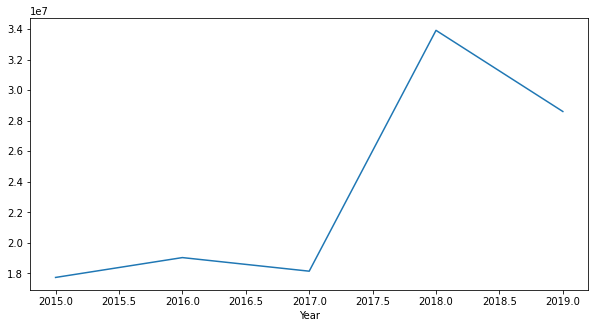

In [123]:
df2 = df.groupby('Year')['Gross (RM)'].mean()
df2.plot(kind='line',figsize=(10,5))

1. Три самых прибыльных фильма в Малазии: Munafik 2, Hantu Kak Limah, Ejen Ali: The Movie
2. Большего всего прибыли принесли фильмы из данного списка, созданные в 2018 году
3. Самый высокобюджетный фильм - Upin & Ipin: Keris Siamang Tunggal

# **Case study 2: Use of data analysis for air quality management**

Для мониторинга состояния качества атмосферного воздуха Центральный совет по контролю за загрязнением (ЦCКЗ) Индии управляет обширной сетью станций мониторинга, разбросанных по всей стране. Регулярно контролируемые параметры включают диоксид серы (SO2), оксиды азота в виде диоксида азота (NO2), озон и мелкие твердые частицы (PM2,5). Основываясь на тенденциях на протяжении многих лет, качество воздуха в столице страны Дели стало предметом озабоченности общественности.
Далее следует пошаговый анализ ежедневных данных о качестве воздуха, чтобы продемонстрировать, как анализ данных может помочь в планировании мероприятий в рамках управления качеством воздуха.
**Примечание.** Набор данных, использованный для этого тематического исследования, называется **«NSIT Dwarka.csv»**. Пожалуйста, обратитесь к разделу технического описания для получения подробной информации о том, как импортировать этот набор данных.

Вопросы, на которые мы хотим ответить с помощью нашего анализа:
 1. Среднегодовые значения: из четырех загрязнителей - SO2, NO2, озона и PM2,5 - среднегодовые уровни которых регулярно превышают установленные годовые нормы?
 2. Суточные нормы. В отношении загрязнителей, какое количество дней в году дневные нормы превышаются?
 3. Временные колебания. В какие месяцы уровни загрязнения превышают критические уровни в большинстве дней?

# **Шаг 1. Импорт данных и изучение характеристик наборов данных.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NSIT Dwarka.csv to NSIT Dwarka.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#aqdata is the name of the DataFrame, short for Air Quality Data.
aqdata=pd.read_csv('NSIT Dwarka.csv')
aqdata.head()

Проверка типов данных столбцов:

In [ ]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2191 non-null   object
 1   To Date    2191 non-null   object
 2   PM2.5      2191 non-null   object
 3   SO2        2187 non-null   object
 4   Ozone      2187 non-null   object
 5   NO2        2190 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


Наблюдение: хотя значения SO2, NO2, озона и PM2,5 являются числовыми, Pandasсчитывает тип данных этих столбцов как «объект». Для работы с этими столбцами (т. Е. Построить график графики, наблюдать за тенденциями, рассчитывать агрегированные значения), нам нужно изменить типы данных
эти столбцы. Кроме того, похоже, есть некоторые недостающие записи.

# **Шаг 2. Обработка данных**

Основываясь на наблюдениях на предыдущем шаге, на этом шаге мы будем
  1. Работать с пропущенными значениями. У нас есть возможность отказаться от нулевые значения или замена нулевых значений.
  2. Изменение типа данных для столбцов.

Проверим наличие отсутствующих значений в наборе данных:

In [ ]:
#Ваш код

Кажется, что пропущенных значений не так много, но в этом и заключается загвоздка. Когда мы проверив первые несколько строк с помощью оператора head, мы увидели, что некоторые пропущенные значения представлены как **None **в исходном наборе данных. Однако они не признаются как нулевые значения от Pandas. Заменим значение **None** значением **np.nan**, чтобы **Pandas** признает эти значения как нулевые значения:

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Мы видим, что столбцы, содержащие числовые значения, не распознаются как числовые столбцы, а столбцы, содержащие даты, также не распознаются правильно. Имея столбцы с неправильными типами данных становятся препятствием для следующего шага, на котором мы анализировать тенденции и строить графики; этот шаг требует, чтобы типы данных столбцов были в
формате, подходящем для чтения. В следующих строках кода мы используем метод ***pd.to_datetime*** для преобразования типа данных.
столбцов «From Date» и «To Date» к типу datetime, что упрощает
анализируйте отдельные компоненты даты, такие как месяцы и годы.

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Поскольку большая часть нашего анализа рассматривает годовые данные, мы создаем новый столбец для извлечения
года, используя функцию **pd.DatetimeIndex**.

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Теперь давайте посмотрим на количество нулевых значений в данных за каждый год:

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Из анализа нулевых значений для каждого года мы видим, что данные за 2014 и
2015 имеют большинство недостающих значений. Следовательно, мы предпочитаем игнорировать данные из
2014 и 2015 годы, и проанализировать данные за 4 года с 2016 по 2019 год. В соответствии с нормами установлено Центральным советом по контролю за загрязнением, Индия, нам необходимо ежедневно контролировать не менее 104
значения для получения среднегодовых значений.
2016, 2017, 2018 и 2019 - это четыре года, за которые будут собираться данные о качестве воздуха. Прежде чем перейти к следующему шагу, мы отбрасываем недостающие значения для каждого года. с 2016 по 2019 год вместо их замены, поскольку у нас достаточно данных (более104 показаний) для каждого из этих четырех лет, чтобы рассчитать среднегодовые значения, как показано ниже.

In [ ]:
#Ваш код

# **Шаг 3: Визуализация**

In [ ]:
Часть 1 анализа: построение среднегодовых значений загрязняющих веществ.
На основе данных мониторинга средних 24-часовых концентраций в атмосферном воздухе PM2,5, SO2,
NO2 и озон (O3), среднегодовые значения наносятся на график для определения параметров, для которых
установленные национальные стандарты качества атмосферного воздуха для среднегодовых превышений.
Сначала мы рассчитываем среднегодовые значения для каждого загрязнителя (PM2,5, SO2, NO2 и озон), как
следует:

In [ ]:
#Ваш код

Пояснение: Обозначения для именования переменных, представляющих средние значения загрязняющих веществ. выглядит следующим образом: первая буква загрязнителя, год и сокращение «avg» для в среднем. Например, s15avg обозначает средний уровень SO2 в 2015 году. Мы используем метод вычисления среднего и функция округления для округления среднего значение до двух десятичных знаков. Мы не рассматриваем озон, поскольку годовые стандарты не учитываются. применимо к озону. Затем мы создаем DataFrame для каждого загрязнителя с двумя столбцами в каждом. Один из столбцы представляют год, а другой столбец показывает средний годовой уровень для этот год.

In [ ]:
#Ваш код

In [ ]:
#Ваш код

Наблюдение: очевидно, что среднегодовые нормы превышаются только для PM2,5.
Для NO2 наблюдаемые значения относительно близки к предписанному стандарту. Для SO2 наблюдаемые значения намного меньше годовой нормы. Поэтому для дальнейшего анализа учитываются только эти два загрязнителя (NO2 и PM2,5)

**Часть 2 анализа качества воздуха: график количества дней в году, когда 24 часа в сутки превышены нормы для PM2,5 и NO2**

В то время как на этапе 1 анализа указываются загрязнители, вызывающие озабоченность с точки зрения управления качеством воздуха. и планирование вмешательств, на шаге 2, на каждый год, мы показываем, как различные уровни
превышение нормативов для суточных значений распределяется. В случае PM2,5 мы
нанесите на график количество дней в году, для которых наблюдаемые значения попадают в следующие диапазоны.
  а. От 0 до 60 мкг / м3
  б. От 61 до 120 мкг / м3
  c. От 121 до 180 мкг / м3
  d. > 180 мкг / м3
Чтобы построить эти данные, нам нужно создать объекты DataFrame для каждого года с 2016 по 2019 год. фиксирование количества дней, в течение которых уровни PM2,5 падали в каждом из этих интервалов, как показано В следующих:

Вывод: наблюдаемые суточные значения NO2 превышаются только в течение трех из пяти лет.
Поскольку наблюдаемые суточные значения NO2 превышают стандартные лишь незначительно и только в течение нескольких дней, следующий шаг ограничен дальнейшим анализом PM2,5.
Часть 3 анализа качества воздуха: Определение месяцев, в которые суточные значения PM2,5 превышают критические уровни в большинстве дней Перед введением ограничений на такие виды деятельности, как движение транспортных средств и строительство, которые вносят значительный вклад в концентрации PM2,5 в окружающей среде, необходимо: предоставлять
достаточное уведомление, чтобы избежать неудобств для широкой публики. Следовательно, для суточных значений PM2,5, значительно превышающих 180 мкг / м3, мы наносим график изменения во времени по годам в течение каждого месяца в году. Для этого для каждого из двенадцати месяцев мы фиксируем количество дней с критическим загрязнением воздуха каждый год с суточными значениями PM2,5, превышающими 180 мкг / м3.
Сначала мы создаем кадры данных для каждого года с количеством дней в каждом месяце, когда значения PM2,5 превышают 180 мкг / м3, как показано ниже.

Из предыдущего графика видно, что большинство критически загрязненных дней приходится на Январь, ноябрь и декабрь. Следовательно, исходя из среднесуточных концентраций PM2,5 зафиксировано за последние четыре года, ограничения движения автотранспорта, строительство деятельность, использование дизельных насосных агрегатов, отклонение движения транспорта, прибывающего в Дели из соседних штатов, и другие аналогичные действия, вероятно, будут введены в январе, ноябре и Декабрь. Чтобы принять такие решения для Дели в целом, анализ данных из других
также потребуются станции мониторинга. Распространение данных и анализ
предыдущие строки помогут людям заранее подготовиться к ограничениям, а также
оцените обоснование таких мер.
Подход, продемонстрированный ранее, с использованием анализа данных в качестве инструмента, помогающего в управление качеством воздуха, использует данные, записанные на одной станции мониторинга, расположенной в
Технологический институт Нетаджи Субхаса (NSIT), Дели. Методология могла быть осуществлена вперед по следующим строкам.
 а. Повторите предыдущий шаг для NO2, чтобы показать критические месяцы, в которые приходится на большую часть дней с зарегистрированными значениями NO2, превышающими 24-часовые стандарты. Выполнение этого упражнения снова поможет определить месяцев, когда уровни загрязнения вызывают озабоченность по обоим параметрам, PM2.5 и NO2, и план.
 б. Повторите анализ, проведенный с данными о качестве воздуха.станции мониторинга НСИТ с использованием аналогичных данных из другие станции, чтобы интервенции для Дели в целом могли быть планируется.